DOGRUSAL(LİNEAR) REGRESYON


In [ ]:
bagımlı ve bagımsız degiskenler arasındaki iliskiyi dogrusal olarak modeller

In [ ]:
başarı degerlendirme(MSE,RMSE,MAE):
*MSE:ortalama hata =cost
RMSE:hata kareler ortalamasının karekökü
MAE:mutlak hata

In [ ]:
parametrelerin tahmin edilmesi(agırlıkların bulunması)

-en kucuk kareler yontemi(normal denklemler yontemi) analitik cozum
-gradient descent yontemi, bir fonksiyonun minimumunu bulmak için kullanılan tekrarlı bir optimizasyon algoritması.

Basit Doğrusal Regresyon Modeli ( Linear Regression )

In [ ]:
# Sales Prediction with Linear Regression

In [43]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [44]:
pd.set_option('display.float_format', lambda x: '%.2f' % x)

In [45]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split, cross_val_score


In [46]:
# Simple Linear Regression with OLS Using Scikit-Learn

In [64]:
from google.colab import files
uploaded = files.upload()


Saving wzDxn15yQ2ung0VKdiww_Kurs Materyalleri(Makine Öğrenmesi).zip to wzDxn15yQ2ung0VKdiww_Kurs Materyalleri(Makine Öğrenmesi).zip


In [66]:
import os
os.listdir('/content/')


['.config',
 '.ipynb_checkpoints',
 '.zip',
 'wzDxn15yQ2ung0VKdiww_Kurs Materyalleri(Makine Öğrenmesi).zip',
 'sample_data']

In [101]:
os.listdir('/content/Kurs Materyalleri(Makine O╠êg╠årenmesi)/datasets')


['diabetes.csv',
 'hitters.csv',
 'breast_cancer.csv',
 'titanic.csv',
 'USArrests.csv',
 'advertising.csv',
 'churn.csv']

In [102]:
import pandas as pd
file_path = '/content/Kurs Materyalleri(Makine O╠êg╠årenmesi)/datasets/advertising.csv'
df = pd.read_csv(file_path)
print(df.shape)


(200, 4)


In [90]:
X = df[["TV"]]
y = df[["sales"]]

In [91]:
# Model

In [92]:
reg_model = LinearRegression().fit(X, y)

# y_hat = b + w*TV

# sabit (b - bias)
reg_model.intercept_[0]

# tv'nin katsayısı (w1)
reg_model.coef_[0][0]

0.04753664043301975

In [93]:
# Tahmin

In [94]:
# 150 birimlik TV harcaması olsa ne kadar satış olması beklenir?

reg_model.intercept_[0] + reg_model.coef_[0][0]*150

14.163089614080658

In [95]:
# 500 birimlik tv harcaması olsa ne kadar satış olur?

reg_model.intercept_[0] + reg_model.coef_[0][0]*500

df.describe().T

,count,mean,std,min,25%,50%,75%,max
TV,200.00,147.04,85.85,0.70,74.38,149.75,218.82,296.40
radio,200.00,23.26,14.85,0.00,9.97,22.90,36.52,49.60
newspaper,200.00,30.55,21.78,0.30,12.75,25.75,45.10,114.00
sales,200.00,14.02,5.22,1.60,10.38,12.90,17.40,27.00


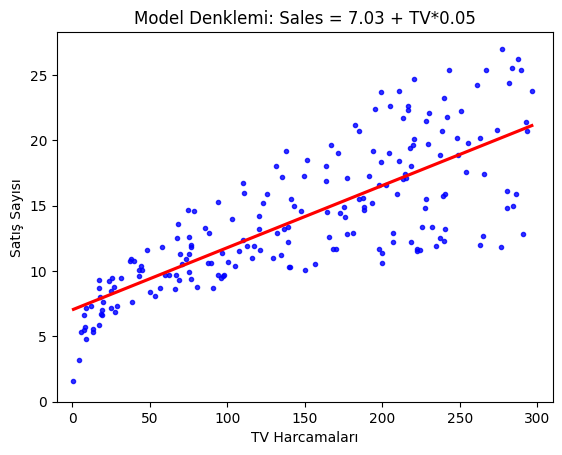

In [96]:
# Modelin Görselleştirilmesi
g = sns.regplot(x=X, y=y, scatter_kws={'color': 'b', 's': 9},
                ci=False, color="r")

g.set_title(f"Model Denklemi: Sales = {round(reg_model.intercept_[0], 2)} + TV*{round(reg_model.coef_[0][0], 2)}")
g.set_ylabel("Satış Sayısı")
g.set_xlabel("TV Harcamaları")
plt.xlim(-10, 310)
plt.ylim(bottom=0)
plt.show()

başarı tahmini


In [100]:
# MSE
y_pred = reg_model.predict(X)
mean_squared_error(y, y_pred)
y.mean()
y.std()

,0
sales,5.22


In [98]:
# MAE
mean_absolute_error(y, y_pred)

2.549806038927486

In [99]:
# R-KARE
reg_model.score(X, y)
#veri setindeki bagımsız degiskenlerin bagımlı degiskenleri acıklama yuzdesi

0.611875050850071

not: degisken sayısı arttıkca rkare sismeye meyilli
not2: istatistik cıktılarla ilgilenmiyporuz. makine ogrenmesi ile yaklasıyoruz

Çoklu Doğrusal Regresyon Modeli ( Multiple Linear Regression )

In [104]:
file_path = '/content/Kurs Materyalleri(Makine O╠êg╠årenmesi)/datasets/advertising.csv'
df = pd.read_csv(file_path)
print(df.shape)

(200, 4)


In [111]:
# Model

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=1)
y_test.shape
y_train.shape

reg_model = LinearRegression().fit(X_train, y_train)

# sabit (b - bias)
reg_model.intercept_

# coefficients (w - weights)
reg_model.coef_

array([[0.0468431 , 0.17854434, 0.00258619]])

In [113]:
# Tahmin

# Aşağıdaki gözlem değerlerine göre satışın beklenen değeri ne?
# TV: 30
# radio: 10
# newspaper: 40

# 2.90
# 0.0468431 , 0.17854434, 0.00258619

#model denklemi:  Sales = 2.90  + TV * 0.04 + radio * 0.17 + newspaper * 0.002
2.90 + 30 * 0.04 + 10 * 0.17 + 40 * 0.002



5.88

In [115]:
yeni_veri = [[30], [10], [40]]
yeni_veri = pd.DataFrame(yeni_veri).T

In [116]:
reg_model.predict(yeni_veri) #kusuratlardan dolayı farklı cıktı

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([[6.202131]])

Tahmin Başarısını Değerlendirme

In [117]:
# Train RMSE
y_pred = reg_model.predict(X_train)
np.sqrt(mean_squared_error(y_train, y_pred))

1.736902590147092

In [118]:
# TRAIN RKARE
reg_model.score(X_train, y_train)

0.8959372632325174

In [119]:
# Test RMSE
y_pred = reg_model.predict(X_test)
np.sqrt(mean_squared_error(y_test, y_pred))

1.4113417558581587

In [120]:
# Test RKARE
reg_model.score(X_test, y_test)

0.8927605914615384

In [122]:
# 10 Katlı CV RMSE
np.mean(np.sqrt(-cross_val_score(reg_model,X,y,cv=10,scoring="neg_mean_squared_error")))

1.6913531708051797

In [123]:
# 5 Katlı CV RMSE
np.mean(np.sqrt(-cross_val_score(reg_model, X,y,cv=5, scoring="neg_mean_squared_error")))

1.7175247278732086

Gradient Descent ile Doğrusal Regresyon

In [124]:
# Cost function MSE
def cost_function(Y, b, w, X):
    m = len(Y)
    sse = 0

    for i in range(0, m):
        y_hat = b + w * X[i]
        y = Y[i]
        sse += (y_hat - y) ** 2

    mse = sse / m
    return mse


In [125]:
# update_weights
def update_weights(Y, b, w, X, learning_rate):
    m = len(Y)
    b_deriv_sum = 0
    w_deriv_sum = 0
    for i in range(0, m):
        y_hat = b + w * X[i]
        y = Y[i]
        b_deriv_sum += (y_hat - y)
        w_deriv_sum += (y_hat - y) * X[i]
    new_b = b - (learning_rate * 1 / m * b_deriv_sum)
    new_w = w - (learning_rate * 1 / m * w_deriv_sum)
    return new_b, new_w